### Chi-square test

The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. It is a non-parametric test that compares the observed frequencies in a contingency table with the frequencies that would be expected if the variables were independent.

The chi-squared test statistic, denoted as $(X^2)$, is calculated using the following formula:

$[ X^2 = \sum \frac{(O_i - E_i)^2}{E_i} ]$

Where:
- Observed Frequencies $(O_i)$.
  - These are the actual counts or occurrences observed in the data. In the chi-squared test, you compare these observed counts to what you would expect based on a theoretical distribution.

- Expected Frequencies $(E_i)$.
  - For a continuous distribution, the expected frequencies are often calculated based on a theoretical distribution. In this example, since we're dealing with the sum of squares of standard normal 
  variables, we expect the resulting distribution to follow a chi-squared distribution.
- Calculation of the Statistic:
  - For each category or bin, you take the square of the difference between the observed and expected counts.
  - You then divide this squared difference by the expected count for that category.
  - This process is done for each category, and the results are summed up.
  
This formula is often used in the context of contingency tables where we compare observed frequencies ($O_i$) with expected frequencies ($E_i$) under a specific hypothesis. The test assesses whether there is a significant difference between the observed and expected frequencies, considering the variability.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

Contingency Table:
dislike_chocolate   No  Yes
like_chocolate             
No                 281  106
Yes                423  190
Fail to reject the null hypothesis. The distribution is consistent with expectations.


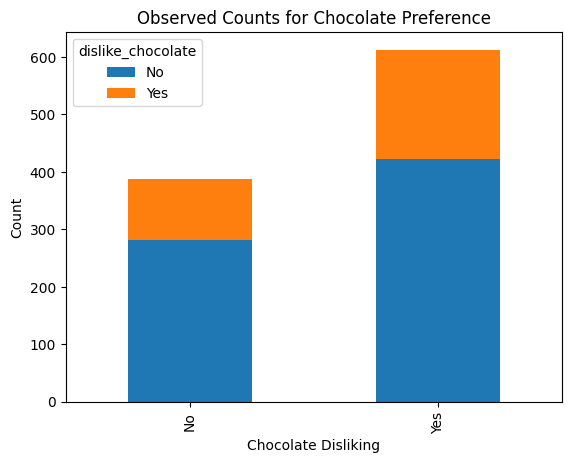

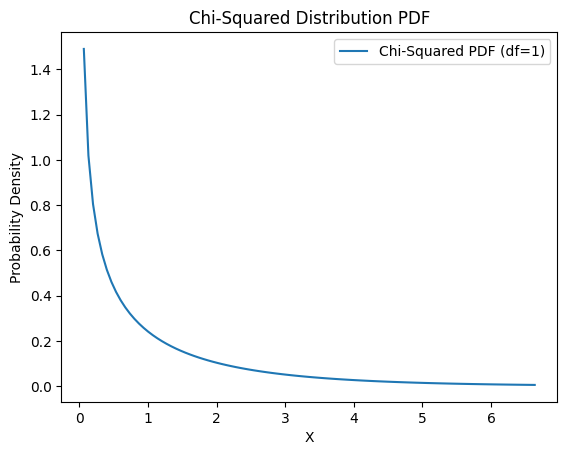

In [29]:
np.random.seed(42)

num_samples = 1000
like_chocolate    = np.random.choice(["Yes", "No"], size=num_samples, p=[0.6, 0.4])
dislike_chocolate = np.random.choice(["Yes", "No"], size=num_samples, p=[0.3, 0.7])

df = pd.DataFrame(
    {"like_chocolate": like_chocolate, "dislike_chocolate": dislike_chocolate}
)

# Create a contingency table using groupby
contingency_table = (
    df.groupby(["like_chocolate", "dislike_chocolate"]).size().unstack(fill_value=0)
)

# Perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Compare p-value with significance level (e.g., 0.05)
if p_val < 0.05:
    print("Reject the null hypothesis. The distribution is not as expected.")
else:
    print(
        "Fail to reject the null hypothesis. The distribution is consistent with expectations."
    )

# Plot the observed counts

contingency_table.plot(kind="bar", stacked=True)
plt.title("Observed Counts for Chocolate Preference")
plt.xlabel("Chocolate Disliking")
plt.ylabel("Count")
plt.show()

# Plot the PDF of the chi-squared distribution
rows, columns = contingency_table.shape
degrees_of_freedom = (rows - 1) * (columns - 1)


x = np.linspace(0, chi2.ppf(0.99, degrees_of_freedom), 100)
plt.plot(
    x,
    chi2.pdf(x, degrees_of_freedom),
    label=f"Chi-Squared PDF (df={degrees_of_freedom})",
)
plt.title("Chi-Squared Distribution PDF")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [30]:
# Example 2: Chi-squared Test (Contingency Table)
# Create a 2x2 contingency table with modified observed counts
contingency_table = np.array([[30, 10], [30, 30]])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)


# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")
print("-"*50)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Significance Level: {p_value}")
print(f"Degree of Freedom : {dof}")
print(f"Expected Frequency : {expected_freq}")

Reject the null hypothesis: There is a significant relationship.
--------------------------------------------------
Chi-squared Statistic: 5.251736111111112
P-value: 0.021924885298341783
Significance Level: 0.021924885298341783
Degree of Freedom : 1
Expected Frequency : [[24. 16.]
 [36. 24.]]


In [32]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a 2x2 contingency table with observed counts
observed_counts = np.array([[30, 10], [20, 40]])

# Perform Chi-squared test
result = chi2_contingency(observed_counts)

chi2_stat, pvalue, dof, expected_counts = chi2_contingency(observed_counts)

# Calculate chi-squared statistic manually
chi2_manual = np.sum((observed_counts - expected_counts) ** 2 / expected_counts)

print(f"Chi-squared Statistic (from function): {chi2_stat}")
print(f"Chi-squared Statistic (manual calculation): {chi2_manual}")

# Display observed and expected counts
print("Observed Counts: ", observed_counts)
print("Expected Counts:")
print(expected_counts)

Chi-squared Statistic (from function): 15.041666666666666
Chi-squared Statistic (manual calculation): 16.666666666666668
Observed Counts:  [[30 10]
 [20 40]]
Expected Counts:
[[20. 20.]
 [30. 30.]]
